## Abalone
To make our lives easier we can divide the age of the abalone into groups. The question we need to answer is what would be a threshold for age that would make sense using. Apart from the age itself we are provided with the information whether a abalone is an infant by tehe sex feature which differenciates between female, male and infrant abalone. We could use this indicator to create a first class we call infant. All other abalone would be adults.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

column_names = [
    "sex",
    "length",
    "diameter",
    "height",
    "whole_weight",
    "shucked_weight",
    "viscera_weight",
    "shell_weight",
    "rings"
] 

df = pd.read_csv("data/abalone.data", names=column_names)
df["length"] = df["length"].apply(lambda x: x*200)
df["diameter"] = df["diameter"].apply(lambda x: x*200)
df["height"] = df["height"].apply(lambda x: x*200)
df["whole_weight"] = df["whole_weight"].apply(lambda x: x*200)
df["shucked_weight"] = df["shucked_weight"].apply(lambda x: x*200)
df["viscera_weight"] = df["viscera_weight"].apply(lambda x: x*200)
df["shell_weight"] = df["shell_weight"].apply(lambda x: x*200)

infants = df[df["sex"] == "I"]
adults =  df[df["sex"] != "I"]

print(f"infants description: \n {infants.describe()}")
print(f"adults description: \n {adults.describe()}")


infants description: 
             length     diameter       height  whole_weight  shucked_weight  \
count  1342.000000  1342.000000  1342.000000   1342.000000     1342.000000   
mean     85.549180    65.298808    21.599106     86.272504       38.207004   
std      21.771545    17.621786     6.399007     57.254932       25.681064   
min      15.000000    11.000000     0.000000      0.400000        0.200000   
25%      72.000000    54.000000    17.000000     41.100000       18.000000   
50%      87.000000    67.000000    22.000000     76.800000       33.950000   
75%     102.000000    78.000000    26.000000    119.875000       54.075000   
max     145.000000   110.000000    44.000000    409.900000      154.700000   

       viscera_weight  shell_weight        rings  
count     1342.000000   1342.000000  1342.000000  
mean        18.402012     25.636438     7.890462  
std         12.507217     16.985424     2.511554  
min          0.100000      0.300000     1.000000  
25%          8.5000

While the amount of rings for infants in gnerally smaller than the amount of rings of the adults there is quite a heavy overlap. So this might not be the most approprate way to split age into broader categories. 

infant distribution: 
 rings
1       1
2       1
3      12
4      51
5     100
6     216
7     267
8     274
9     173
10     92
11     62
12     21
13     24
14     14
15     10
16      7
17      7
18      5
19      2
20      2
21      1
Name: count, dtype: int64
adult distribution: 
 rings
3       3
4       6
5      15
6      43
7     124
8     294
9     516
10    542
11    425
12    246
13    179
14    112
15     93
16     60
17     51
18     37
19     30
20     24
21     13
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64
age_class
old       1447
young     1407
medium    1323
Name: count, dtype: int64


<Axes: xlabel='age_class'>

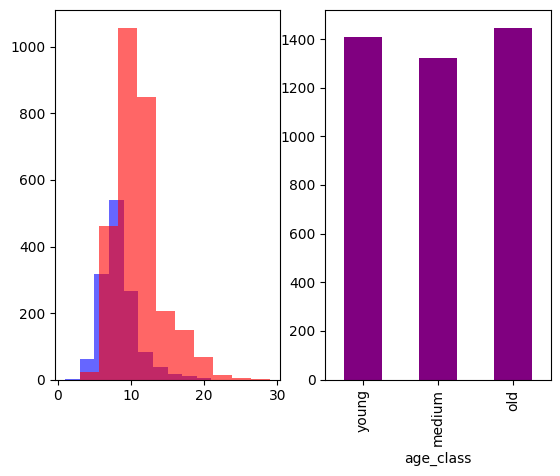

In [15]:
infant_dist = infants["rings"].value_counts().sort_index()
adult_dist = adults["rings"].value_counts().sort_index()

print(f"infant distribution: \n {infant_dist}")
print(f"adult distribution: \n {adult_dist}")
figure, (ax1, ax2) = plt.subplots(1, 2)


ax1.hist(infants["rings"], label="infants", color="blue", alpha = 0.6)
ax1.hist(adults["rings"], label="adults", color="red", alpha = 0.6)

#plt.legend()

#plt.xlabel('Rings')
#plt.ylabel('Instances')
df['age_class'] = df["rings"].apply(lambda rings: "young" if rings <=8 else ("medium" if rings <= 10 else "old"))
print(df['age_class'].value_counts())
counts = df['age_class'].value_counts()[['young','medium','old']]
counts.plot(ax=ax2,kind='bar', color="purple")

#plt.ylabel('Instances')
#plt.savefig('images/class_distribution.png')
#plt.savefig('images/infant_adult_class_distribution.png')

Initially this overlap is a little confusing. I would have assumed that abalone became sexualy mature around the same age.
We can find the reason for this overlap in the original paper. Sexual maurity seems to be more related to size than to age "Analysis of residuals showed that fecundity is clearly size-related, with a poor relationship
between age and fecundity."

stunted blacklip abalone (Haliotis rubra)

https://www.researchgate.net/profile/Warwick-Nash/publication/287546509_7he_Population_Biology_of_Abalone_Haliotis_species_in_Tasmania_I_Blacklip_Abalone_H_rubra_from_the_North_Coast_and_Islands_of_Bass_Strait/links/5d949460458515202b7bf592/7he-Population-Biology-of-Abalone-Haliotis-species-in-Tasmania-I-Blacklip-Abalone-H-rubra-from-the-North-Coast-and-Islands-of-Bass-Strait.pdf

Abalone growth varies with seasons, food availability, population density, temperature, local hydrography of the reef and stress (https://www.sciencedirect.com/science/article/abs/pii/S1385110110001218)

Since most of the feature are growth realted this is not a trivial task. Especially given the fact that the abalone were harvested in multiple areas with differing conditions "Abalone populations were surveyed in five areas" The original paper goes more into detail of how growth varied in the different ares


Without expert knowledge it is difficult to specify a meaningful threshold. Therefore we will focus on the thresold suggested by    David Clark, Zoltan Schreter, Anthony Adams "A Quantitative Comparison of
   Dystal and Backpropagation", submitted to the Australian Conference on
   Neural Networks (ACNN'96). Data set treated as a 3-category classification
   problem (grouping ring classes 1-8, 9 and 10, and 11 on).

this leads to a fairly balanced class distribution

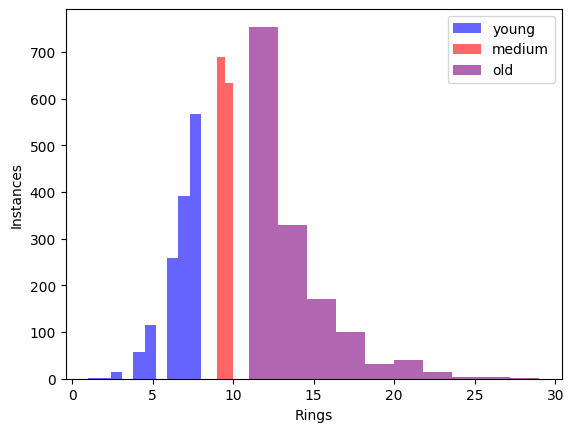

In [16]:
plt.hist(df[df["age_class"]=="young"]["rings"], label="young", color="blue", alpha = 0.6)
plt.hist(df[df["age_class"]=="medium"]["rings"], label="medium", color="red",bins=2, alpha = 0.6)
plt.hist(df[df["age_class"]=="old"]["rings"], label="old", color="purple", alpha = 0.6)
plt.legend()
plt.xlabel('Rings')
plt.ylabel('Instances')
plt.savefig('images/youth_medium_old_class_dstribution.png')

        Name            Data Type       Meas.   Description                        
        ----            ---------       -----   -----------
        Sex             nominal                 M, F, and I (infant)            Nominal
        Length          continuous      mm      Longest shell measurement       ratio
        Diameter        continuous      mm      perpendicular to length         ratio
        Height          continuous      mm      with meat in shell              ratio   
        Whole weight    continuous      grams   whole abalone                   ratio  
        Shucked weight  continuous      grams   weight of meat                  ratio
        Viscera weight  continuous      grams   gut weight (after bleeding)     ratio 
        Shell weight    continuous      grams   after being dried               ratio   
        Rings           integer                 +1.5 gives the age in years     ratio

In [17]:
#no missing values
print(df.isnull().sum())

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age_class         0
dtype: int64


In [18]:
#why are there some instances were individual parts are heavier than the whole weight?? 
#especially after drying and bleeding I would assume the opposite
weight_diff = df["whole_weight"] - df["shucked_weight"] - df["viscera_weight"] - df["shell_weight"]
weight_diff[weight_diff<0]

42      -1.0
43      -2.1
44      -0.6
45      -0.9
46     -16.1
        ... 
3963    -0.5
3969    -6.6
3996   -60.5
4046    -7.5
4143    -2.7
Length: 158, dtype: float64

In [19]:
#two instances with height of 0. Is this a missing value or just tiny abalone?
zero_height = df[df["height"] == 0]
print(len(zero_height))

2


In [20]:
#one hot encode sex
df = pd.get_dummies(df, columns=['sex', ])
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age_class,sex_F,sex_I,sex_M
0,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15,old,False,False,True
1,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7,young,False,False,True
2,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9,medium,True,False,False
3,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10,medium,False,False,True
4,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7,young,False,True,False


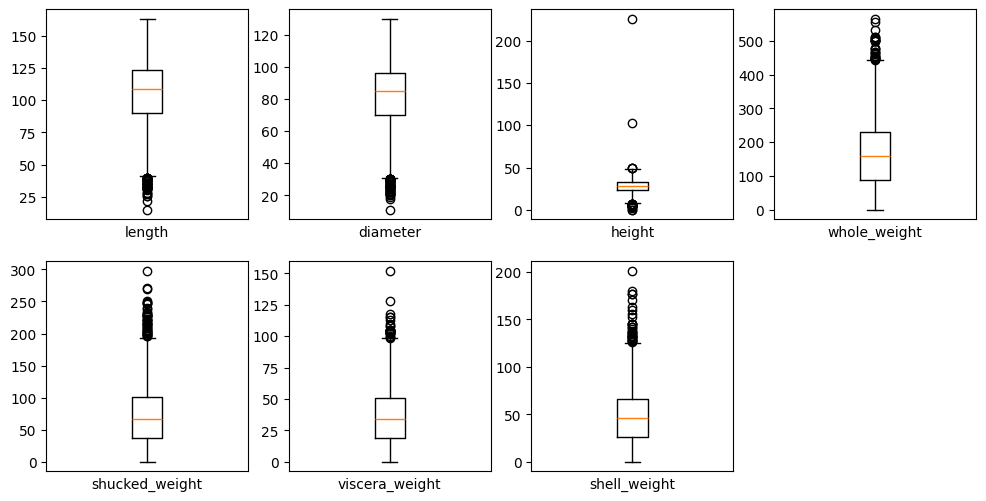

In [52]:
from math import floor
df_plot = df.select_dtypes(include='number').drop(columns=["rings"])
r = round(len(df_plot.columns)/2)
fig, axs = plt.subplots(2, r, figsize=(12, 6))
fig.suptitle("",fontsize=16)
for idx, feature in enumerate(df_plot):
    i = floor(idx/r)
    j = idx%r
    axs[i][j].boxplot(df[feature])
    axs[i][j].set_xticks([])
    axs[i][j].set_xlabel(feature)  
    
fig.delaxes(axs[1][3])
plt.savefig('images/boxplots.png')

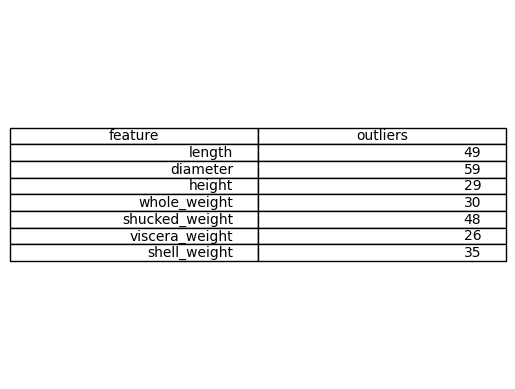

In [53]:
row_headers = []
table_values = []
outliers_df = pd.DataFrame(columns=["feature", "outliers"])

for feature in df_plot.columns:
    data = df_plot[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    feat_outliers = pd.Series({"feature": feature, "outliers": len(outliers)})
    outliers_df = pd.concat([
                outliers_df, 
                pd.DataFrame([feat_outliers], columns=feat_outliers.index)]
           ).reset_index(drop=True)

fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
plt.table(cellText=outliers_df.values, colLabels=outliers_df.columns, loc='center')




array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'whole_weight'}>],
       [<Axes: title={'center': 'shucked_weight'}>,
        <Axes: title={'center': 'viscera_weight'}>,
        <Axes: title={'center': 'shell_weight'}>,
        <Axes: title={'center': 'rings'}>]], dtype=object)

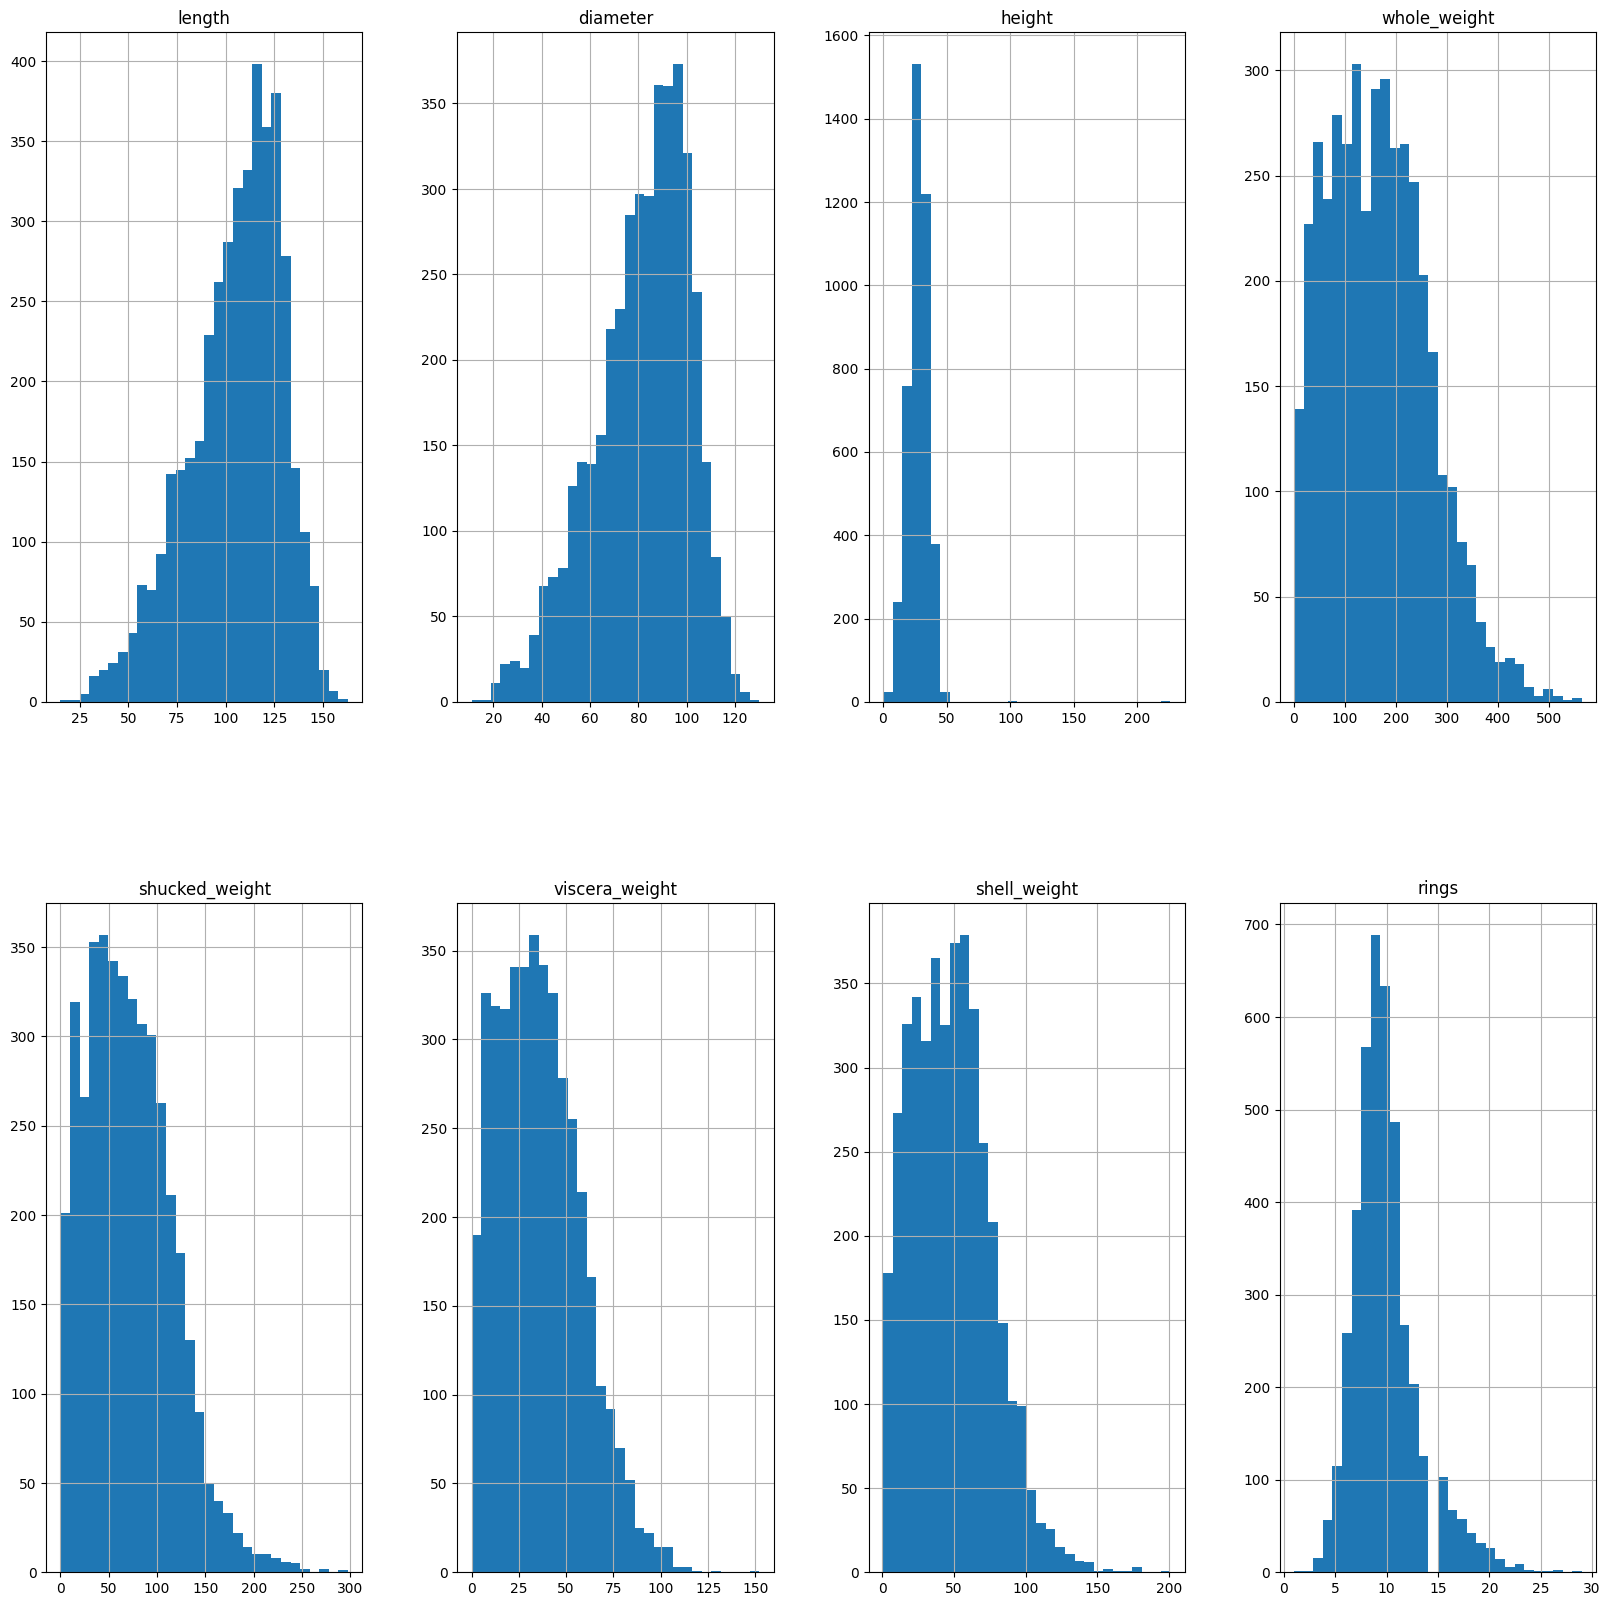

In [56]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins=30)

In [12]:
df_plot.skew()

length           -0.639873
diameter         -0.609198
height            3.128817
whole_weight      0.530959
shucked_weight    0.719098
viscera_weight    0.591852
shell_weight      0.620927
dtype: float64

If skewness is approximately 0, your data is normally distributed. If skewness is between 0 and +1 (or -1), your data is moderately skewed. If it's above +1 (or below -1), you might be looking at significantly skewed data

### Outliers

**Maybe only remove one of the height outliers?**

We can see that there are two extreme outliers with a very high height value leading to a very skewed height distribution.

This could be due to either unusual growth of the abalone or a measurement error. Without expert biological knowledge about abalone this is hard to verify. Without such knowlege a guess we could make is that the volume of a abalone correlates with it's weight. Indeed we can confirm a strong linear 
correlation:



In [13]:
number_attributes = df.select_dtypes(include='number')
number_attributes["volume"] = number_attributes["length"]*number_attributes["diameter"]*number_attributes["height"]
corr_matrix = number_attributes.corr()['volume']
number_attributes["height_in_mm"] = number_attributes["height"].apply(lambda x: x*200)
number_attributes = number_attributes.sort_values(by=['height_in_mm'], ascending=True)
print(number_attributes)

print(corr_matrix)

      length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
1257   0.430     0.340   0.000        0.4280          0.2065          0.0860   
3996   0.315     0.230   0.000        0.1340          0.0575          0.0285   
236    0.075     0.055   0.010        0.0020          0.0010          0.0005   
2169   0.165     0.115   0.015        0.0145          0.0055          0.0030   
1174   0.635     0.495   0.015        1.1565          0.5115          0.3080   
...      ...       ...     ...           ...             ...             ...   
1763   0.775     0.630   0.250        2.7795          1.3485          0.7600   
2179   0.595     0.470   0.250        1.2830          0.4620          0.2475   
1428   0.815     0.650   0.250        2.2550          0.8905          0.4200   
1417   0.705     0.565   0.515        2.2100          1.1075          0.4865   
2051   0.455     0.355   1.130        0.5940          0.3320          0.1160   

      shell_weight  rings    volume  he

To try to evaluate whether or not this might be a measurment error we calculate the median ratio between volume and weight. In these cases the ratio is much smaller. 3 and 10 respectively compared to a median of ~24
Without knowing the biology of abalone it is again hard to tell whether or not these measurements are realistic. We can find a few other examples with similar ratios in the range between 7 to 10. Therefore we conclude that this value could indeed be realistic as far as we can tell and don't remove it for the time being.

A ratio of 3 consideribly differs with the other data points though. Finding information about height of this particular abalone species was difficult. We found one more paper in which abalone of this specious were analysed. The abalone with the highest height was 55mm high. Given these findings we assume that a height of 226mm, which is double the height of the second highest abalone of this dataset as well quadruple as high as the highest abaline of the other dataset, is unrealistic and will be removed.

height (31 + 6 mm; 10-55 mm),https://www.researchgate.net/publication/248886464_Growth_and_morphometry_in_abalone_Haliotis_rubra_Leach_from_Victoria

In [21]:
number_attributes["ratio"] = number_attributes["whole_weight"]/number_attributes["volume"]
median_values = number_attributes.median()
number_attributes.head()
height_outliers = number_attributes[number_attributes["height"] > 0.4]
height_outliers["height_in_mm"] = height_outliers["height"].apply(lambda x: x*200)

height_outliers.head()


/tmp/nix-shell.xK3lHG/ipykernel_524149/3482170296.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_outliers["height_in_mm"] = height_outliers["height"].apply(lambda x: x*200)


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,volume,height_in_mm,ratio
1417,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,0.205137,103.0,10.773268
2051,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,0.182523,226.0,3.254380


In [119]:
test = number_attributes[number_attributes["ratio"] < 11]
print(len(test))
test.head()


4


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,volume,ratio
1417,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10,0.205137,10.773268
2051,0.455,0.355,1.130,0.5940,0.3320,0.1160,0.1335,8,0.182523,3.254380
2127,0.400,0.310,0.100,0.1270,0.1060,0.0710,0.0850,7,0.012400,10.241935
2641,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7,0.017338,7.584715


<Axes: >

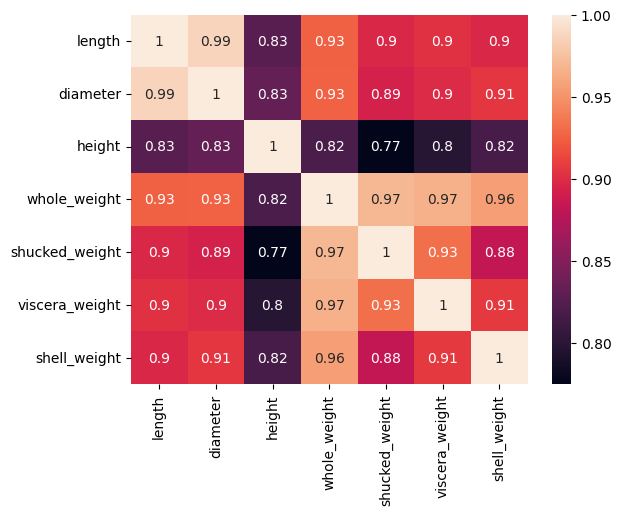

In [15]:
import seaborn as sns
sns.heatmap(df_plot.corr(method='pearson', min_periods=1), annot=True,)

In [ ]:
PCA